# Portfolio Optimization 2 [ Modern Portfolio Theory (MPT) ]

*Disclaimer: The information provided in this analysis of AAPL, GOOG, AMZN, and MSFT financial data is for educational purposes only and should not be considered as financial advice. The results and insights presented may not accurately reflect future performance, and investing in these stocks involves significant risk. It is strongly recommended to consult with a qualified financial advisor before making any investment decisions.*

#### Download Stock Price Data


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List of stocks
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

# Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-01-01", group_by='ticker')

[*********************100%***********************]  4 of 4 completed


#### Step 1: Calculate Daily Returns and Expected Returns

In [5]:
# Step 1: Calculate Daily Returns and Expected Returns

# Calculate daily returns
daily_returns = pd.DataFrame()
for ticker in tickers:
    daily_returns[ticker] = stock_data[ticker]['Adj Close'].pct_change()

# Calculate annualized mean returns (assuming 252 trading days in a year)
mean_returns = daily_returns.mean() * 252

#### Step 2: Calculate Covariance Matrix

In [6]:
# Step 2: Calculate Covariance Matrix

# Calculate the covariance matrix (annualized)
cov_matrix = daily_returns.cov() * 252


#### Step 3: Portfolio Optimization using Monte Carlo Simulation

In [7]:
# Step 3: Portfolio Optimization using Monte Carlo Simulation

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weight_array = []

# Risk-free rate (assuming 0 for simplicity)
risk_free_rate = 0.0

# Initialize random portfolios
for i in range(num_portfolios):
    # Random allocation to stocks (must sum to 1)
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weight_array.append(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * mean_returns)

    # Expected portfolio variance and standard deviation
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (risk-adjusted return)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std

    # Save the results: portfolio return, volatility, Sharpe ratio
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio


#### Step 4: Find the Optimal Portfolio

In [8]:
# Step 4: Find the Optimal Portfolio

# Locate the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_portfolio = results[:, max_sharpe_idx]
optimal_weights = weight_array[max_sharpe_idx]

print(f"Max Sharpe Ratio: {max_sharpe_portfolio[2]}")
print(f"Return: {max_sharpe_portfolio[0]}")
print(f"Volatility: {max_sharpe_portfolio[1]}")
print(f"Optimal Weights: {dict(zip(tickers, optimal_weights))}")

Max Sharpe Ratio: 0.9227615041799638
Return: 0.2885236627525397
Volatility: 0.3126741432597406
Optimal Weights: {'AAPL': 0.6188488661894703, 'GOOG': 0.0367508486993196, 'AMZN': 0.0028786484829768, 'MSFT': 0.34152163662823326}


#### Step 5: Plot Efficient Frontier

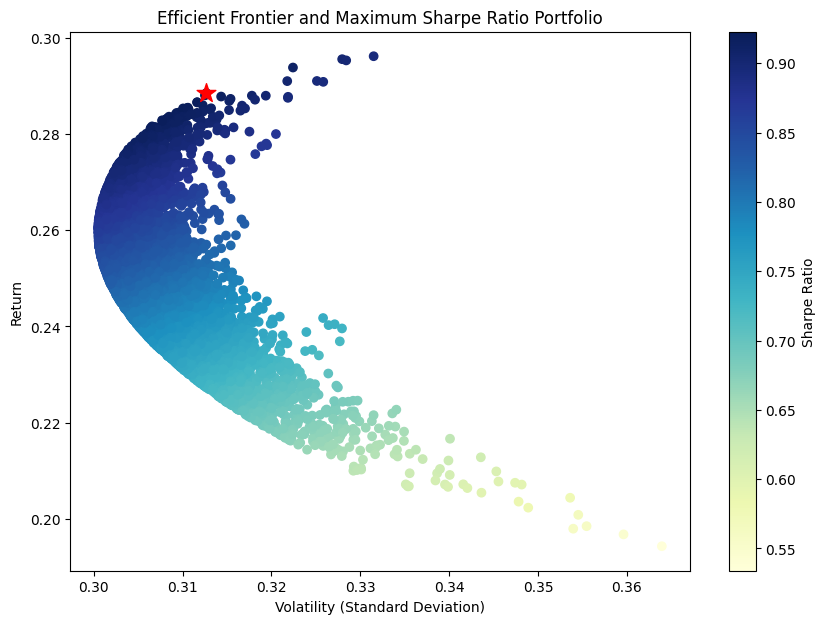

In [9]:
# Step 5: Plot Efficient Frontier

plt.figure(figsize=(10, 7))

# Scatter plot for portfolios
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the max Sharpe ratio
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], c='red', marker='*', s=200)

plt.title('Efficient Frontier and Maximum Sharpe Ratio Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')

plt.show()


Key Findings:

- Efficient Frontier: The curved line represents the maximum return you can achieve for a given level of risk. This is the "sweet spot" where you get the most reward for the risk you're taking.
- Maximum Sharpe Ratio Portfolio: The red star marks the ideal portfolio. It offers the highest return for the amount of risk it takes on. This is often considered the best balance of risk and reward.
In simple terms:


Think of the graph like a map. The efficient frontier is the highway, and the red star is the destination with the best view. We're aiming for the highest point on the highway while keeping the journey as safe as possible.


What does this mean for us?



This analysis suggests that a portfolio composed of `[AAPL, GOOG, AMZN, MSFT]` in the proportions indicated by the red star is the most efficient way to invest in these assets. It offers the best combination of potential return and risk management.

Explanation:

Step 1: Calculates daily returns and annualized returns for each stock.

Step 2: Computes the covariance matrix that reflects the relationship between the stocks.

Step 3: Runs a Monte Carlo simulation for `10,000` random portfolios, calculates the expected return, risk (volatility), and the Sharpe ratio for each portfolio.

Step 4: Identifies the portfolio with the highest Sharpe ratio (the optimal portfolio).

Step 5: Plots the Efficient Frontier, which shows all portfolios simulated. The optimal portfolio is highlighted with a red star.